In [216]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

In [217]:
label_counts = np.load("label_count.npy")
nonzero_idx = np.nonzero(label_counts)[0]

mapping = {}
for idx in nonzero_idx:
    mapping[idx] = len(mapping)

num_classes = len(mapping)

counts = np.zeros((num_classes))
for idx in mapping:
    counts[mapping[idx]] = label_counts[idx]

In [242]:
info = np.load("ingredient_info_all.npy").item()
assert(len(info['ingredient_text']) == len(info['ingredient_labels']))

In [244]:
possible_tags = [set() for i in range(num_classes)]
label_counts = [defaultdict(int) for i in range(num_classes)]
num_labels = np.zeros((num_classes))

for i in tqdm(range(len(info['ingredient_text']))):
    ingredient_text = info['ingredient_text'][i]
    ingredient_labels = info['ingredient_labels'][i]
    num_ingredients = np.sum(ingredient_labels > 0)
    
    for label in ingredient_labels[:num_ingredients]:
        if label not in mapping:
            continue
        
        label = mapping[label]
        num_labels[label] += 1
        current_text = set(ingredient_text)
        if len(possible_tags[label]) == 0:
            possible_tags[label] = current_text
        else:
            possible_tags[label] = possible_tags[label].intersection(current_text)

        for text in current_text:
#             if text in possible_tags[label]:
            label_counts[label][text] += 1


 54%|█████▍    | 183387/340922 [00:14<00:12, 12983.48it/s]


100%|██████████| 340922/340922 [00:26<00:00, 13009.93it/s]

We can uniquely identify 3689/3748 of the ingredients...

In [245]:
unique, unique_counts = np.unique([len(x) for x in possible_tags], return_counts=True)
print(unique)
print(unique_counts)

# All tags that are definite
determined_tags = set([list(tag)[0] for tag in possible_tags if len(tag) == 1])

# Remove definite tags from possible_tags
filtered_tags = []
for tag in possible_tags:
    if len(tag) > 1:
        filtered_tags.append(tag - determined_tags)
    else:
        filtered_tags.append(tag)

unique, unique_counts = np.unique([len(x) for x in filtered_tags], return_counts=True)
print(unique)
print(unique_counts)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
[3621   23   15   18    9    4   10    8    3    9    7    7    2    4
    1    2    1    1    1    2]
[ 0  1  2  3  4  5  6  7 12]
[   1 3688   30   13    8    2    2    3    1]


In [247]:
possible_tags

[{'coarse salt',
  'cucumbers',
  'kombu',
  'red chili pepper',
  'sugar',
  'vinegar',
  'water'},
 {',', '0,5', '1', '1-2', '150', '2', '200 (1 )', '3', '300', '50'},
 {'1'},
 {'salt'},
 {'2'},
 {'water'},
 {'butter'},
 {'sugar'},
 {'pepper'},
 {'oil'},
 {'flour'},
 {'chicken'},
 {'. .', '1 .', '1.', '100 .', '2', '300 .', ':'},
 {'3'},
 {'cheese'},
 {'garlic'},
 {'( 1 1/4', '() 1/2', '() 3/4', '1(5g)', '1/2', '2', '3'},
 {'onion'},
 {'4'},
 {'milk'},
 {'cream'},
 {'eggs'},
 {'egg'},
 {'meat'},
 {'bread'},
 {'onions'},
 {'cake'},
 {'potatoes'},
 {'dry',
  'fresh lemon rind',
  'garlic clove',
  'grape leaves',
  'lemons',
  'mozzarella cheese',
  'of fresh mint',
  'olive oil',
  'roma tomato',
  'salt and pepper'},
 {'2 each',
  '20',
  '9 each striped gum',
  'Ritz cracker',
  'graham crackers',
  'hard candies',
  'vanilla frosting',
  'water'},
 {'paper'},
 {'juice'},
 {'rice'},
 {'chocolate'},
 {'8', 'kaiser rolls'},
 {'batter'},
 {'olive oil'},
 {'tomatoes'},
 {'6'},
 {'vanill

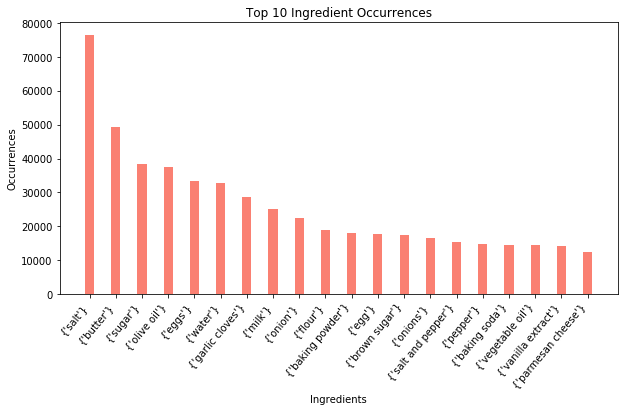

In [254]:
k = 20
top_idx = np.argsort(-counts)[1:k+1]
tags = np.array([x for x in filtered_tags])

fig, ax = plt.subplots(figsize=(10,5))

index = np.arange(k)
bar_width = 0.35

rects1 = ax.bar(index, counts[top_idx], bar_width,
                alpha=1.0, color='salmon')
ax.set_xticks(index)
ax.set_xticklabels(tags[top_idx])
ax.set_xlabel('Ingredients')
ax.set_ylabel('Occurrences')
ax.set_title('Top 10 Ingredient Occurrences')

plt.xticks(rotation=50, ha='right', va="top")
plt.show()